PythonではじめるKaggleスタートブック練習用

https://github.com/upura/python-kaggle-start-book

https://www.kaggle.com/sishihara/python-kaggle-start-book-ch02-01

https://www.kaggle.com/sishihara/python-kaggle-start-book-ch02-02

https://www.kaggle.com/sishihara/python-kaggle-start-book-ch02-03

https://www.kaggle.com/sishihara/python-kaggle-start-book-ch02-04

https://www.kaggle.com/sishihara/python-kaggle-start-book-ch02-05

In [277]:
# パッケージの読み込み
import numpy as np
import pandas as pd

In [278]:
# 入力ファイルの確認
!ls ../input/titanic

gender_submission.csv  test.csv  train.csv


In [279]:
# データの読み込み
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [280]:
# 読み込んだデータを数行表示
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [281]:
# 読み込んだデータを数行表示
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
# 読み込んだデータを数行表示
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [283]:
# trainとtestを一括で処理するために行方向に結合
data = pd.concat([train, test], sort=False)

In [284]:
# data内の各列の欠損値の数を計算
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

特徴量エンジニアリング

In [285]:
# Sex
# maleを0に、femaleを1に変換
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [286]:
# Embarked
# 欠損値を補完した後に、文字を数値に変換する
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':2}).astype(int)
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [287]:
# Fare
# Fareの平均で欠損値を補う
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [288]:
# Age
# Ageの平均値と標準偏差をもとに乱数で決定
# 平均値 - 標準偏差 から 平均値 + 標準偏差 の間の整数値からランダムに決定
#age_avg = data['Age'].mean()
#age_std = data['Age'].std()
#data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)
#data.isnull().sum()

# 2.4 Ageは中央値で補完
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [289]:
# 使用しない列を削除
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)  # axis=1 → 列の削除
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.355997,29.503186,33.295479,0.394194
std,0.486592,0.837836,0.478997,12.905241,51.738879,0.653499
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.275000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000


In [290]:
# trainとtestを連結して処理してきたdataを分割する
train = data[:len(train)]
test = data[len(train):]

In [291]:
# 特徴量と目的変数に分割
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [292]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [293]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [294]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0


機械学習アルゴリズムの学習・予測

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(random_state=0, solver='sag')

In [297]:
y_pred = clf.predict(X_test)
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

提出

In [298]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)

2.3 探索的データ分析

Pandas Profilingで概要を確認

In [299]:
import pandas_profiling

train = pd.read_csv('../input/titanic/train.csv')
# train.profile_report()

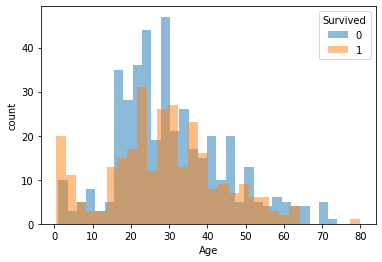

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# AgeとSurvivedの関係
plt.hist(train.loc[train['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.5, label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')
plt.show()

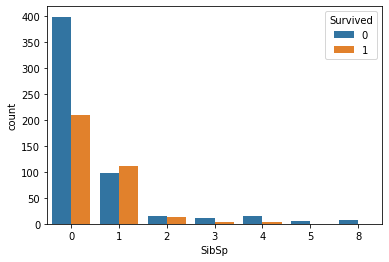

In [301]:
# SibSpとSurvivedの関係
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')
plt.show()

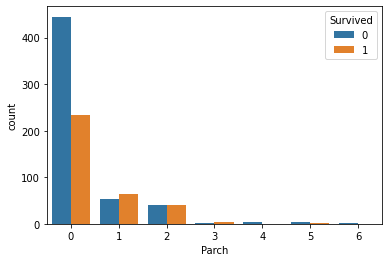

In [302]:
# ParchとSurvivedの関係
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')
plt.show()

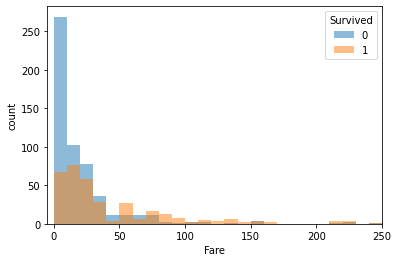

In [303]:
# FareとSurvivedの関係
plt.hist(train.loc[train['Survived'] == 0, 'Fare'].dropna(), range=(0, 250), bins=25, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1, 'Fare'].dropna(), range=(0, 250), bins=25, alpha=0.5, label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')
plt.xlim(-5, 250)
plt.show()

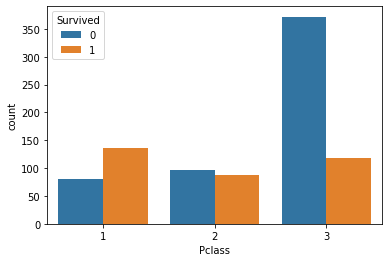

In [304]:
# PclassのクラスとSurvivedの関係
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

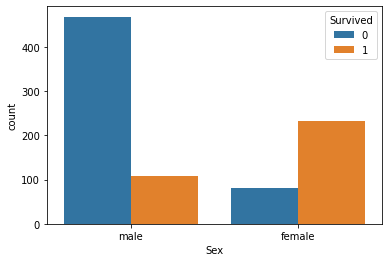

In [305]:
# SexとSurvivedの関係
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

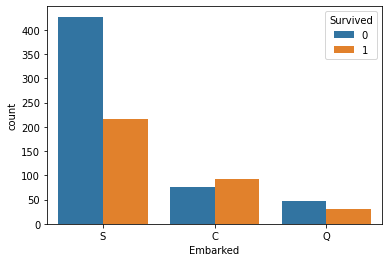

In [306]:
# EmbarkedとSurvivedの関係
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.show()

In [307]:
# Ageの再現性
age_avg = data['Age'].mean()
age_std = data['Age'].std()

np.random.randint(age_avg - age_std, age_avg + age_std)

28

In [308]:
# 仮説から新しい特徴量を作る
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)


import seaborn as sns

data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
#sns.countplot(x='FamilySize', data=train, hue='Survived')

data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

# 予測性能の比較
# FamilySizeとIsAloneを加えた場合
sub = pd.read_csv('../input/titanic/gender_submission.csv')

clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int, y_pred_familysize_isalone))
# 6277 0.77511
sub.to_csv('submission_familysize_isalone.csv', index=False)

#sub.head()


# IsAloneのみを加えた場合
clf.fit(X_train.drop('FamilySize', axis=1), y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize', axis=1))

sub['Survived'] = list(map(int, y_pred_isalone))
# 6277 0.77511
sub.to_csv('submission_isalone.csv', index=False)


# FamilySizeのみを加えた場合
clf.fit(X_train.drop('IsAlone', axis=1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis=1))

sub['Survived'] = list(map(int, y_pred_familysize))
# 6277 0.77511
sub.to_csv('submission_familysize.csv', index=False)

#sub.head()

# FamilySizeとIsAloneを加えていない場合
clf.fit(X_train.drop(['FamilySize', 'IsAlone'], axis=1), y_train)
y_pred = clf.predict(X_test.drop(['FamilySize', 'IsAlone'], axis=1))

sub['Survived'] = list(map(int, y_pred))
# 6277 0.77511
sub.to_csv('Submission.csv', index=False)

#sub.head()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [309]:
# 2.5 いろいろな機械学習アルゴリズムを使ってみよう
import numpy as np
import pandas as pd

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [310]:
# 不要なカラムの削除
delete_columns = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [311]:
# sklearnを用いた機械学習アルゴリズムの切り替え
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(penalty='12', solver='sag', random_state=0)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# y_pred[:10]

sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission_randomforest.csv', index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [317]:
# LightGBM
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)
categorical_features = ['Embarked', 'Pclass', 'Sex']

import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], verbose_eval=10, num_boost_round=1000, early_stopping_rounds=10)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

#y_pred[:10]

y_pred = (y_pred > 0.5).astype(int)
#y_pred[:10]

sub['Survived'] = y_pred
sub.to_csv('submission_lightgbm.csv', index=False)
sub.head()

[LightGBM] [Info] Number of positive: 57, number of negative: 92
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382550 -> initscore=-0.478737
[LightGBM] [Info] Start training from score -0.478737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
